In [1]:
import numpy as np
import scipy.integrate as scp
import statistics as st
import matplotlib.pyplot as plt
import os
import multiprocessing as mp
from functools import partial
from myfuncs import *

In [8]:
# pool = mp.Pool(10)
# result = pool.apply_async(square, [10])
# print(result.get(timeout=20))

p = 0.0, q = 0.0, trial_close = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], mean = 1
p = 0.0, q = 0.1, trial_close = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], mean = 1
p = 0.0, q = 0.2, trial_close = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], mean = 1
p = 0.0, q = 0.3, trial_close = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], mean = 1
p = 0.0, q = 0.4, trial_close = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], mean = 1
p = 0.0, q = 0.5, trial_close = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], mean = 1
p = 0.0, q = 0.6, trial_close = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], mean = 1
p = 0.0, q = 0.7, trial_close = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], mean = 1
p = 0.0, q = 0.8, trial_close = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], mean = 1
p = 0.0, q = 0.9, trial_close = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], mean = 1
p = 0.0, q = 1.0, trial_close = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], mean = 1
p = 0.1, q = 0.0, trial_close = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], mean = 0
p = 0.1, q = 0.1, trial_close = [1, 1, 1, 1, 1, 1, 1, 1, 0, 1], mean = 0.9
p = 0.1, q = 0.2, trial_close = [1, 1, 1, 1, 1, 1

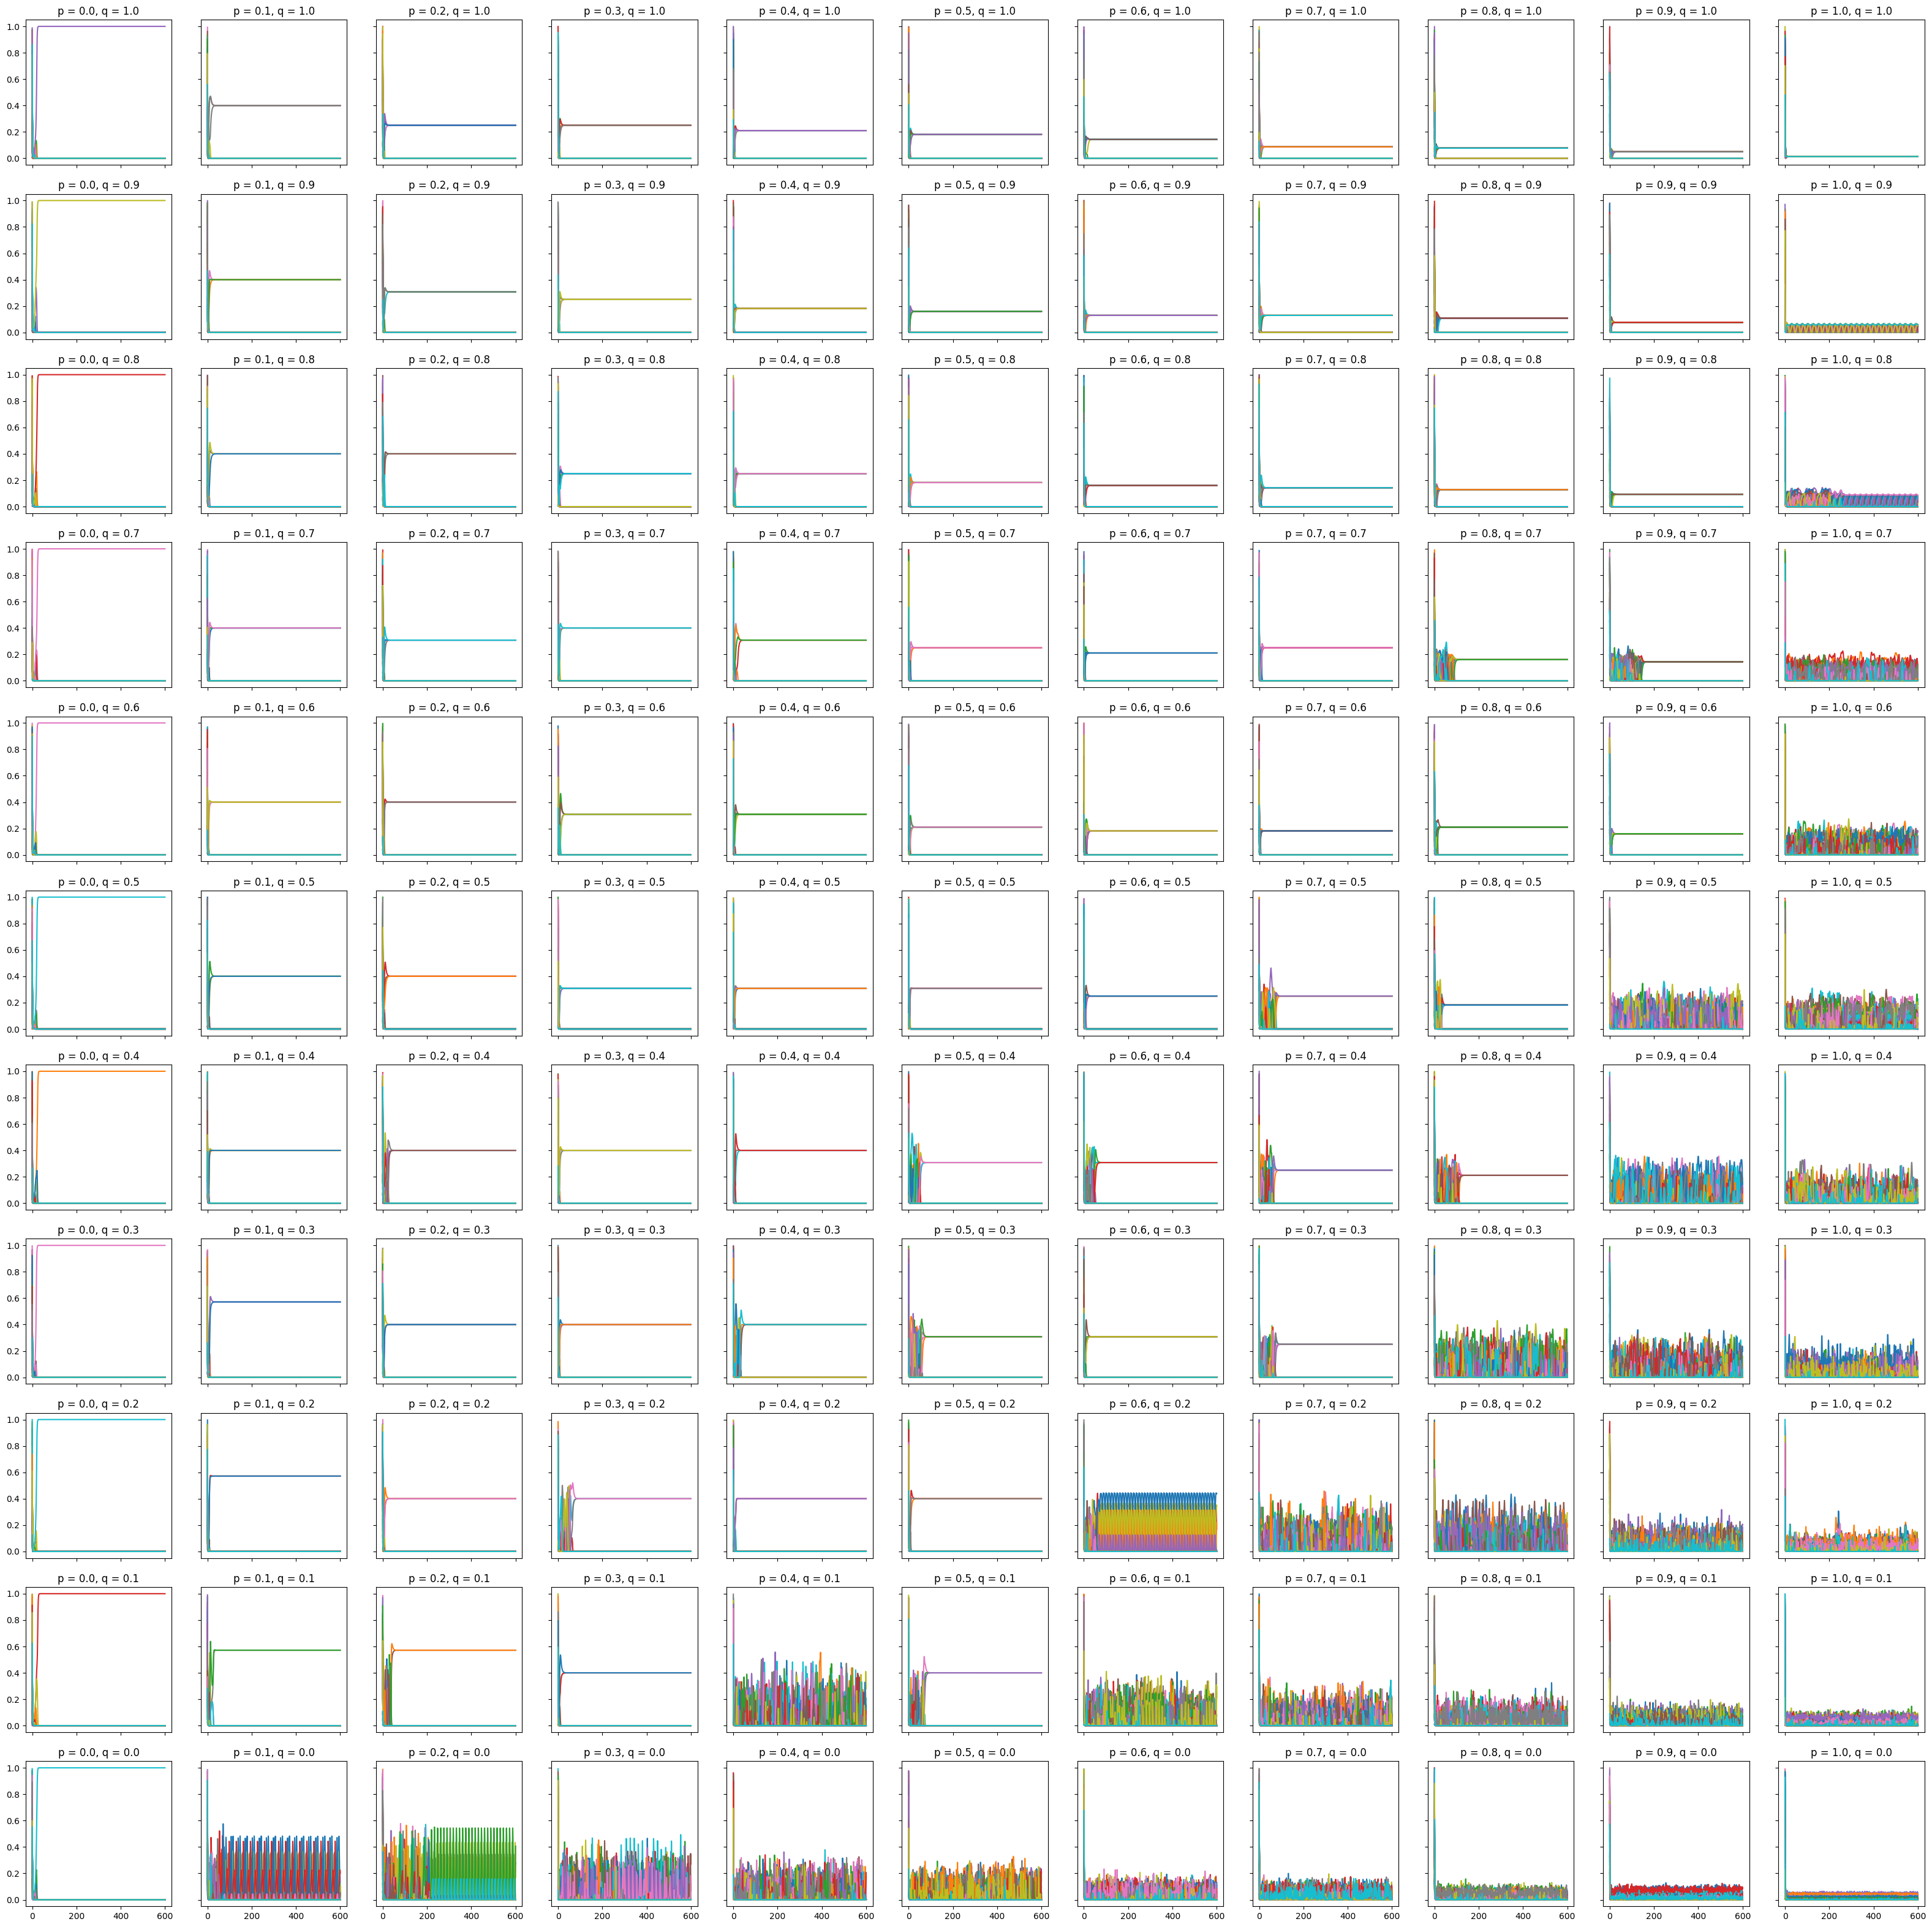

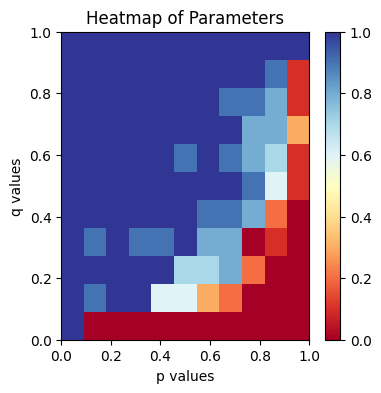

In [ ]:
# matrix size
mat_size = 100
num_trials = 50
param_average = np.zeros((11,11))
p_chart = np.zeros((11,11))
q_chart = np.zeros((11,11))

fig, axs = plt.subplots(11, 11, figsize=(40,40), sharex=True, sharey=True)

for counter_x in range(11):
    p = round(counter_x * 0.1, 2)
    for counter_y in range(11):
        q = round(counter_y * 0.1, 2)
        
        trial_close = [] 
        
        pool_trial = mp.Pool() # Creates a pool of workers to run multiple trials asynchronously
        worker = partial(worker_onetrial, mat_size, p, q)       # Bind the necessary parameters to the worker
        results = pool_trial.map(worker, range(num_trials)) # Do num_trials trials and save results
                                                                #  to a list called results
        pool_trial.close() # No longer adding new trials
        pool_trial.join() # Wait for trials to finish

        for result, sol in results:
            trial_close.append(result)
            
        # store results
        param_average[counter_y, counter_x] = st.mean(trial_close)

        print(f"p = {p}, q = {q}, trial_close = {trial_close}, mean = {st.mean(trial_close)}")

        # plot system dynamics
        u = sol.t
        v = sol.y.T
        axs[11 - (counter_y + 1), counter_x].plot(u, v)
        axs[11 - (counter_y + 1), counter_x].title.set_text(f"p = {p}, q = {q}")

        p_chart[counter_y, counter_x] = p
        q_chart[counter_y, counter_x] = q

# generate heatmap
fig = plt.figure(figsize=(4, 4))
plt.imshow(param_average, cmap='RdYlBu', origin='lower', extent=[0, 1, 0, 1], aspect='auto')
plt.colorbar()
plt.xlabel('p values')
plt.ylabel('q values')
plt.title('Heatmap of Parameters')

plt.xticks(np.linspace(0, 1, 6))
plt.yticks(np.linspace(0, 1, 6))

# Save heatmap
# filename = f'Heatmaps/Matrix_Size_{mat_size}_new_algorithm'
# i = 0
# while os.path.exists(f"{filename}_{i}.png"):
#     i += 1

# plt.savefig(f"{filename}_{i}.png", dpi=720)

plt.show()

In [ ]:
# limit

def f(a,p,q,N):
    u =np.sqrt(2*np.pi*N)*(N/e)**N
    v = np.sqrt(2*np.pi * a * N) * ((a*N)/e)**(a*N) * np.sqrt(2*np.pi*(N*(1-a))) * ((N*(1-a))/e)**(N*(1-a))
    w = p*q
    bin_exp = ((a*N)**2-a*N)/2
    x = (1-(p*((1-q)/2)+p*q)**(a*N))**(N*(1-a))
    return((u/v)*(w**bin_exp)*x)

x_coords=[]
entries=[]
entries_2=[]
entries_3=[]

r1 = np.random.uniform(0,1)
r2 = np.random.uniform(0,1)
r3 = np.random.uniform(0,1)

print(r1,r2,r3)

for i in range(80):
    # entries.append(f(1/2,1/2,1/2,i+1))
    # entries_2.append(f(0.3,0.6,0,i+1))
    entries_3.append(f(0.01, r2, r3,i+1))
    x_coords.append(i+1)

# plt.loglog(x_coords, entries)
# plt.loglog(x_coords, entries_2)
plt.loglog(x_coords, entries_3)